In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [5]:
# DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
# df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
# sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [10]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [14]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
15421,id_1002,Rome,"['Italian', 'Mediterranean']",1003.0,$,759.0,"[['Excellent Porchetta', 'Fantastic Porchetta ...",/Restaurant_Review-g187791-d3187728-Reviews-I_...,d3187728,1,4.0
48277,id_6014,London,"['Asian', 'Thai', 'Vegetarian Friendly']",6023.0,$$ - $$$,115.0,"[['Our date night place', 'Saturday night thai...",/Restaurant_Review-g186338-d3441266-Reviews-Pu...,d3441266,1,4.0
20590,id_4717,Barcelona,NaN,4718.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187497-d9994264-Reviews-Bo...,d9994264,1,4.5
37465,id_1335,Madrid,NaN,1337.0,NaN,63.0,"[['excellent!'], ['12/07/2017']]",/Restaurant_Review-g187514-d11905874-Reviews-R...,d11905874,1,4.0
9335,id_9335,Paris,NaN,12665.0,NaN,NaN,[['A surprisingly lively bar in a fairly seda....,/Restaurant_Review-g187147-d12563281-Reviews-B...,d12563281,0,0.0


In [15]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [17]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
        ..
49970    0
49971    0
49972    1
49973    0
49974    0
49975    0
49976    0
49977    0
49978    0
49979    0
49980    0
49981    0
49982    0
49983    0
49984    0
49985    0
49986    1
49987    0
49988    1
49989    1
49990    0
49991    0
49992    0
49993    0
49994    0
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [18]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [19]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

In [20]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [21]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
43025,id_2658,['Chinese'],2660.0,$$ - $$$,28.0,"[['GOOD FARE AT SICHUAN'], ['10/09/2015']]",/Restaurant_Review-g187514-d8092946-Reviews-Si...,d8092946,1,4.0,...,0,0,0,0,0,0,0,0,0,0
9502,id_9502,"['Italian', 'Mediterranean', 'European', 'Vege...",14.0,$$ - $$$,418.0,"[['Best ""Real"" Italian food in Dublin', 'Exell...",/Restaurant_Review-g186605-d6542415-Reviews-I_...,d6542415,0,0.0,...,0,0,0,0,0,0,0,0,0,0
13399,id_1141,NaN,1135.0,NaN,0.0,"[['Еxcellent and delicious food'], ['03/16/201...",/Restaurant_Review-g189541-d10071825-Reviews-P...,d10071825,1,5.0,...,0,0,0,0,0,0,0,0,0,0
3061,id_3061,"['Singaporean', 'Indian', 'Bar', 'Pub']",2368.0,$,34.0,"[['Good local indian restaurant', '👍'], ['10/1...",/Restaurant_Review-g187323-d1866177-Reviews-Am...,d1866177,0,0.0,...,0,0,0,0,0,0,0,0,0,0
41101,id_66,"['Mediterranean', 'Greek', 'Vegetarian Friendl...",67.0,$,1915.0,"[['Delicious food', 'A totally fine restaurant...",/Restaurant_Review-g189400-d1902225-Reviews-Sm...,d1902225,1,4.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [23]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [24]:
# Ваша обработка 'Price Range'

data['Price Range_conv'] = data['Price Range']
data.loc[data['Price Range_conv'] == '$$$$', 'Price Range_conv'] = 3
data.loc[data['Price Range_conv'] == '$$ - $$$', 'Price Range_conv'] = 2
data.loc[data['Price Range_conv'] == '$', 'Price Range_conv'] = 1
data['Price Range_conv'] = data['Price Range_conv'].fillna(0)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [25]:
# тут ваш код на обработку других признаков
# .....

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

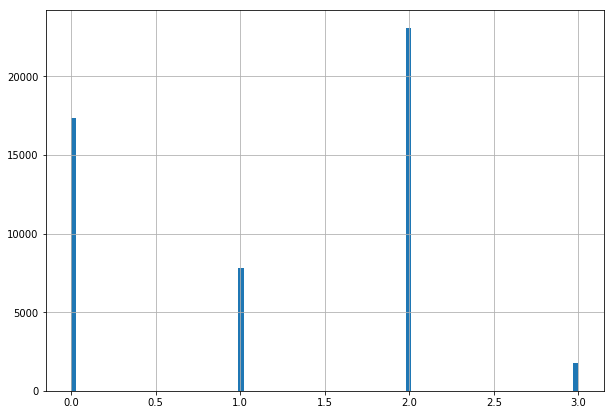

In [26]:
plt.rcParams['figure.figsize'] = (10,7)
data['Price Range_conv'].hist(bins=100)

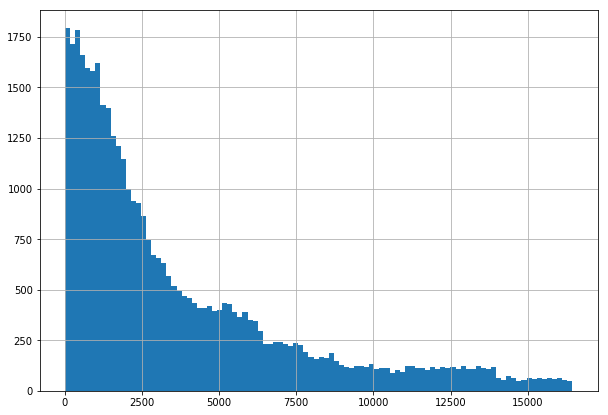

In [27]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

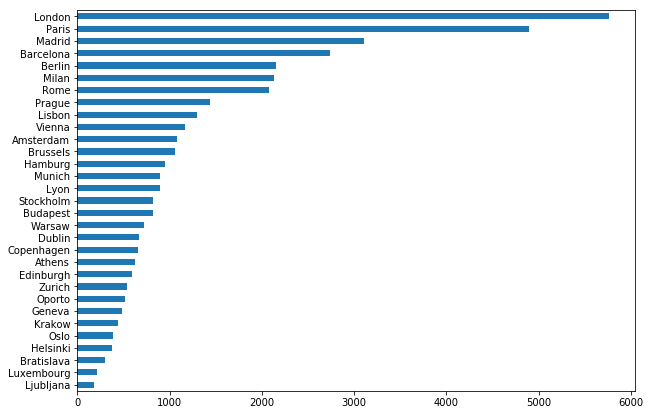

In [28]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

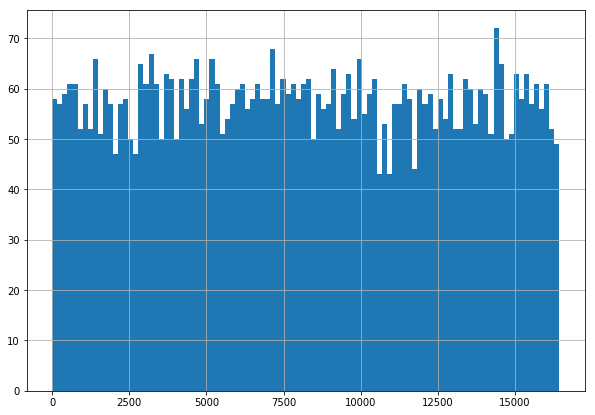

In [29]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

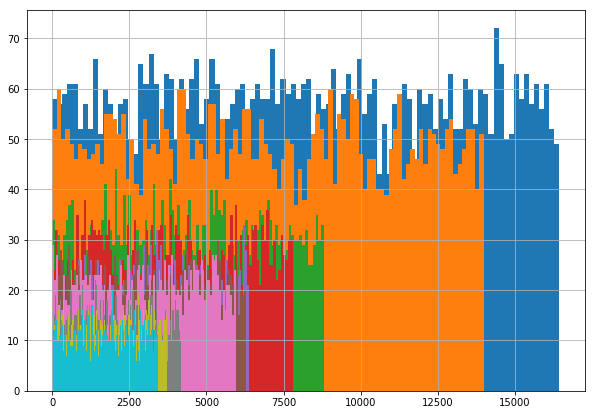

In [30]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

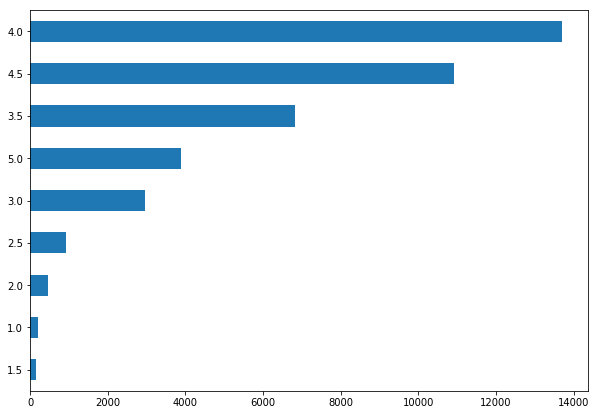

In [31]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

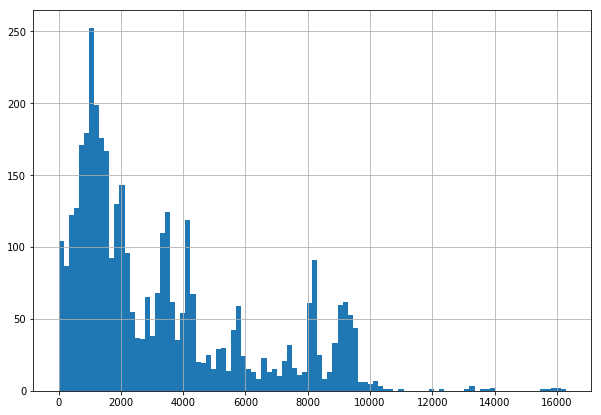

In [32]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

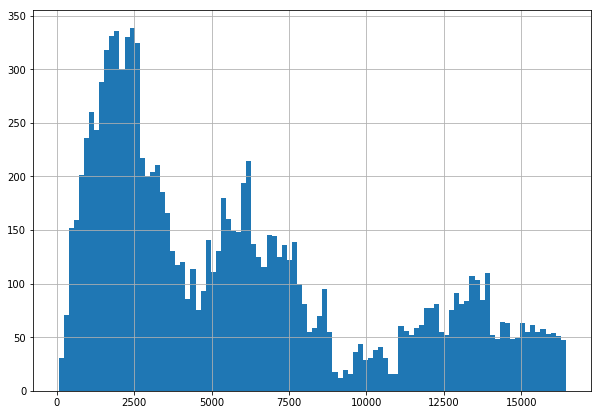

In [33]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

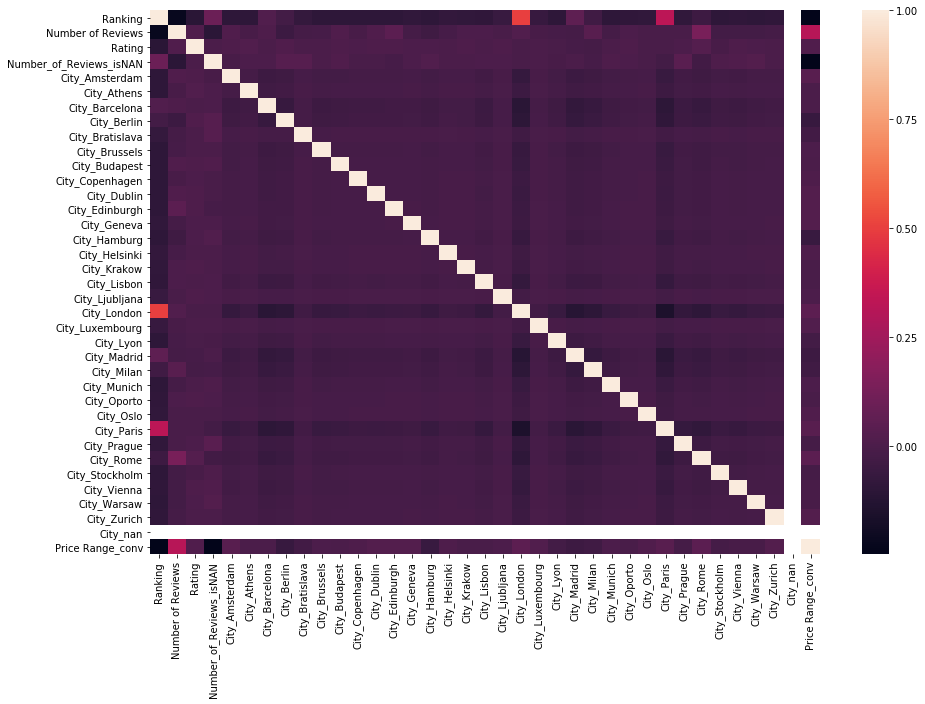

In [34]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [35]:
# на всякий случай, заново подгружаем данные
# df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')


df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')

df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [36]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....

        
    #add new features         
    
    costofliving = pd.read_csv('movehubcostofliving.csv') 
    data_costofliving = costofliving[costofliving['City'].isin(df_output['City'].unique())]        
    df_output = pd.merge(df_output, data_costofliving, on=['City'], how='left')    
#     print(df_output.columns)
    df_output.fillna(0, inplace=True)
#     print(df_output.columns)
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    df_output = df_output.drop(['City_nan'], axis=1)
    # тут ваш код не Encoding фитчей
    # ....
    df_output['Price Range_conv'] = data['Price Range']
    df_output.loc[df_output['Price Range_conv'] == '$$$$', 'Price Range_conv'] = 3
    df_output.loc[df_output['Price Range_conv'] == '$$ - $$$', 'Price Range_conv'] = 2
    df_output.loc[df_output['Price Range_conv'] == '$', 'Price Range_conv'] = 1
    df_output['Price Range_conv'] = df_output['Price Range_conv'].fillna(0)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    REPLACE = ['[', ']', ',', "'", "!"]
    df_output['Reviews'] = df_output['Reviews'].str.lower()
    for replace_elem in REPLACE:
        df_output['Reviews'] = df_output['Reviews'].str.replace(replace_elem, '')

    df_output['Reviews'] = df_output['Reviews'].str[:-22]
    
    WORDS = ['good', 'great', 'slow', 'best', 'amazing', 'supper', 'quick']
    for words in WORDS:
        df_output[words] = df_output['Reviews'].str.contains(words)*1
        df_output[words] = pd.to_numeric(df_output[words])

    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    print(df_output.info())
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [37]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 53 columns):
Cuisine Style            50000 non-null object
Ranking                  50000 non-null float64
Price Range              50000 non-null object
Number of Reviews        50000 non-null float64
Reviews                  49998 non-null object
URL_TA                   50000 non-null object
sample                   50000 non-null int64
Rating                   50000 non-null float64
Cappuccino               50000 non-null float64
Cinema                   50000 non-null float64
Wine                     50000 non-null float64
Gasoline                 50000 non-null float64
Avg Rent                 50000 non-null float64
Avg Disposable Income    50000 non-null float64
City_Amsterdam           50000 non-null uint8
City_Athens              50000 non-null uint8
City_Barcelona           50000 non-null uint8
City_Berlin              50000 non-null uint8
City_Bratislava          50000 non-null u

,Ranking,Number of Reviews,sample,Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,...,City_Warsaw,City_Zurich,Price Range_conv,good,great,slow,best,amazing,supper,quick
44884,4061.0,0.0,1,2.0,1.32,5.08,3.29,1.18,821.94,723.30,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36889,242.0,219.0,1,4.0,1.83,9.38,3.41,1.36,1534.47,1747.59,...,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22512,1556.0,63.0,1,4.5,1.32,6.82,4.26,1.24,937.73,1193.48,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15005,12634.0,0.0,1,3.0,2.56,8.95,5.11,1.32,2131.21,2045.96,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18210,1724.0,434.0,1,4.0,2.49,11.26,6.98,1.40,2590.76,1992.89,...,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44109,786.0,5.0,1,4.5,2.57,10.23,8.52,1.43,1534.47,1960.71,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37891,1433.0,14.0,1,3.5,2.39,8.31,8.52,1.39,1278.72,1918.09,...,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18067,383.0,54.0,1,4.5,1.83,9.38,3.41,1.36,1534.47,1747.59,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37822,2430.0,11.0,1,5.0,1.32,5.08,3.29,1.18,821.94,723.30,...,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22962,2296.0,3.0,1,4.5,2.13,7.67,4.26,1.25,1248.90,1619.72,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_preproc.columns

Index(['Ranking', 'Number of Reviews', 'sample', 'Rating', 'Cappuccino',
       'Cinema', 'Wine', 'Gasoline', 'Avg Rent', 'Avg Disposable Income',
       'City_Amsterdam', 'City_Athens', 'City_Barcelona', 'City_Berlin',
       'City_Bratislava', 'City_Brussels', 'City_Budapest', 'City_Copenhagen',
       'City_Dublin', 'City_Edinburgh', 'City_Geneva', 'City_Hamburg',
       'City_Helsinki', 'City_Krakow', 'City_Lisbon', 'City_Ljubljana',
       'City_London', 'City_Luxembourg', 'City_Lyon', 'City_Madrid',
       'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo', 'City_Paris',
       'City_Prague', 'City_Rome', 'City_Stockholm', 'City_Vienna',
       'City_Warsaw', 'City_Zurich', 'Price Range_conv', 'good', 'great',
       'slow', 'best', 'amazing', 'supper', 'quick'],
      dtype='object')

In [39]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 49 columns):
Ranking                  50000 non-null float64
Number of Reviews        50000 non-null float64
sample                   50000 non-null int64
Rating                   50000 non-null float64
Cappuccino               50000 non-null float64
Cinema                   50000 non-null float64
Wine                     50000 non-null float64
Gasoline                 50000 non-null float64
Avg Rent                 50000 non-null float64
Avg Disposable Income    50000 non-null float64
City_Amsterdam           50000 non-null uint8
City_Athens              50000 non-null uint8
City_Barcelona           50000 non-null uint8
City_Berlin              50000 non-null uint8
City_Bratislava          50000 non-null uint8
City_Brussels            50000 non-null uint8
City_Budapest            50000 non-null uint8
City_Copenhagen          50000 non-null uint8
City_Dublin              50000 non-null uint8

In [40]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)
# fill test data
test_data.fillna(0, inplace=True)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)
X.columns

Index(['Ranking', 'Number of Reviews', 'Cappuccino', 'Cinema', 'Wine',
       'Gasoline', 'Avg Rent', 'Avg Disposable Income', 'City_Amsterdam',
       'City_Athens', 'City_Barcelona', 'City_Berlin', 'City_Bratislava',
       'City_Brussels', 'City_Budapest', 'City_Copenhagen', 'City_Dublin',
       'City_Edinburgh', 'City_Geneva', 'City_Hamburg', 'City_Helsinki',
       'City_Krakow', 'City_Lisbon', 'City_Ljubljana', 'City_London',
       'City_Luxembourg', 'City_Lyon', 'City_Madrid', 'City_Milan',
       'City_Munich', 'City_Oporto', 'City_Oslo', 'City_Paris', 'City_Prague',
       'City_Rome', 'City_Stockholm', 'City_Vienna', 'City_Warsaw',
       'City_Zurich', 'Price Range_conv', 'good', 'great', 'slow', 'best',
       'amazing', 'supper', 'quick'],
      dtype='object')

In [41]:
# make normalization

X=(X-X.min())/(X.max()-X.min())
X.columns

Index(['Ranking', 'Number of Reviews', 'Cappuccino', 'Cinema', 'Wine',
       'Gasoline', 'Avg Rent', 'Avg Disposable Income', 'City_Amsterdam',
       'City_Athens', 'City_Barcelona', 'City_Berlin', 'City_Bratislava',
       'City_Brussels', 'City_Budapest', 'City_Copenhagen', 'City_Dublin',
       'City_Edinburgh', 'City_Geneva', 'City_Hamburg', 'City_Helsinki',
       'City_Krakow', 'City_Lisbon', 'City_Ljubljana', 'City_London',
       'City_Luxembourg', 'City_Lyon', 'City_Madrid', 'City_Milan',
       'City_Munich', 'City_Oporto', 'City_Oslo', 'City_Paris', 'City_Prague',
       'City_Rome', 'City_Stockholm', 'City_Vienna', 'City_Warsaw',
       'City_Zurich', 'Price Range_conv', 'good', 'great', 'slow', 'best',
       'amazing', 'supper', 'quick'],
      dtype='object')

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [43]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [44]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 48), (40000, 48), (40000, 47), (32000, 47), (8000, 47))

# Model 
Сам ML

In [45]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [46]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [47]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [48]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.209435


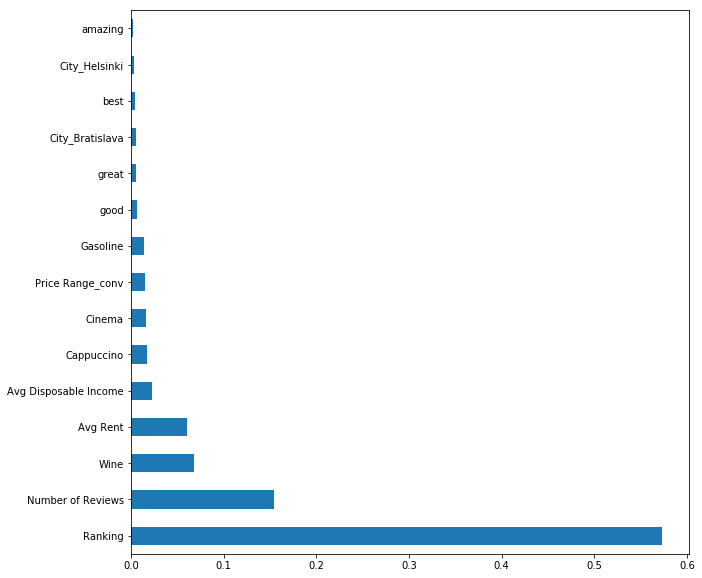

In [49]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [50]:
test_data.sample(5)

,Ranking,Number of Reviews,Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,City_Amsterdam,...,City_Warsaw,City_Zurich,Price Range_conv,good,great,slow,best,amazing,supper,quick
6569,879.0,0.0,0.0,1.45,5.11,4.26,1.28,852.48,681.99,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6554,11624.0,123.0,0.0,2.56,8.95,5.11,1.32,2131.21,2045.96,0,...,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1445,2322.0,23.0,0.0,1.32,6.82,4.26,1.24,937.73,1193.48,0,...,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7063,6933.0,7.0,0.0,1.32,6.82,4.26,1.24,937.73,1193.48,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8674,5003.0,2.0,0.0,1.19,6.82,4.26,1.53,1704.96,1491.84,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
test_data = test_data.drop(['Rating'], axis=1)

In [52]:
test_data=(test_data-test_data.min())/(test_data.max()-test_data.min())

In [53]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [54]:
predict_submission

array([3.12 , 4.03 , 4.31 , ..., 3.005, 4.445, 4.19 ])

In [55]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.120
1,id_1,4.030
2,id_2,4.310
3,id_3,4.205
4,id_4,4.400
5,id_5,4.150
6,id_6,2.575
7,id_7,2.685
8,id_8,4.055
9,id_9,4.270


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
